In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

## Absolute Frequency

#### The total number of data points for each category. 

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


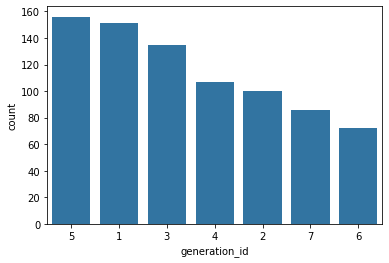

In [3]:
# lets look at generation id
# set our basecolor also

base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
            order = [5,1,3,4,2,7,6]);

In [4]:
# write code to order our bar chart, instead of doing it the manual way
gen_order = pokemon['generation_id'].value_counts().index

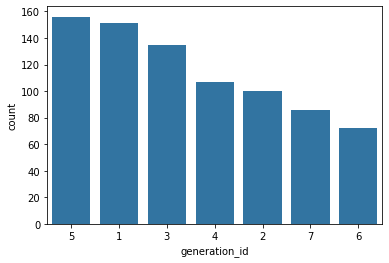

In [5]:
# update our chart
sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
            order = gen_order);

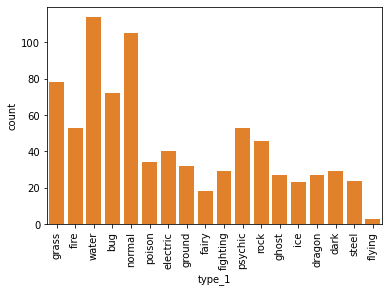

In [6]:
# lets fix the labels on this chart:
b_color = sb.color_palette()[1]
sb.countplot(data = pokemon, x = 'type_1', color = b_color);
plt.xticks(rotation = 90);

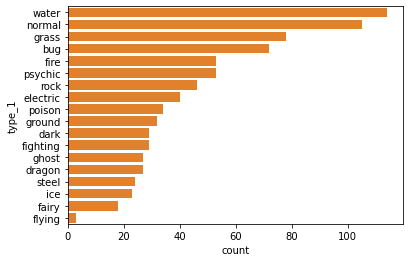

In [7]:
# since its nominal, lets reorder them by counts. code to order our chart
type_order = pokemon['type_1'].value_counts().index

# or you can make a horizontal chart
b_color = sb.color_palette()[1]
sb.countplot(data = pokemon, y = 'type_1', color = b_color, order = type_order);

## Relative Frequency

#### The frequency of a category as it relates to the total number of data points.

Using proportions allows us to see how much each category contributes to the whole.

In [8]:
# This example will use a sample of pokemon data. type_1 and 2 have been merged into a single column.
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                         value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level', value_name = 'type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [9]:
# create variables to get types in order frequency for our bar chart

type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

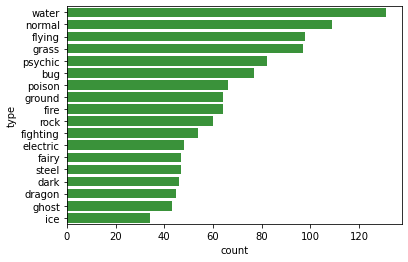

In [10]:
#choose your base color and set up your bar chart

base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

In [11]:
# what PROPORTION of pokemon have each type? Lets adjust this to see RELATIVE counts
# step 1 - adjust the tick marks from absolute to relative. Find the max proportion first.

n_pokemon = pkmn_types['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [12]:
# use numpy's arange function to create a set of evenly proportion values from 0 - max in steps of 2%. store in a variable.
# tip: test your code before storing it!

tick_props = np.arange(0, max_prop, 0.02)

# ticknames for these marks will need appropriate spacing as well. Use a list comprehension to format.

tick_names = ['{:0.2f}'.format(v) for v in tick_props]

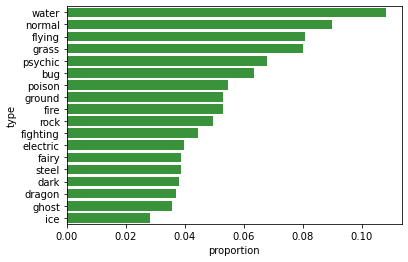

In [13]:
# step 2 - modify your chart with the new tick mark data using matplotlibs xticks function

base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

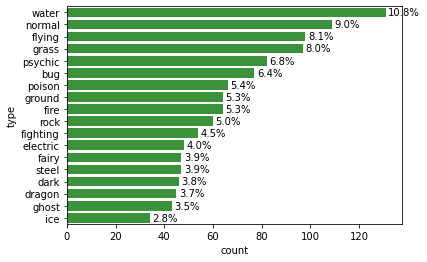

In [14]:
# we can jazz this up further. lets add the counts back to the tickmarks, and include proportion labels on the bars.
# use a loop to place text elements one by one

base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center');

In [ ]:
# The chart below will have overlap, so use the rcParams function to manually adjust the chart size.

rcParams['figure.figsize'] = 12,4

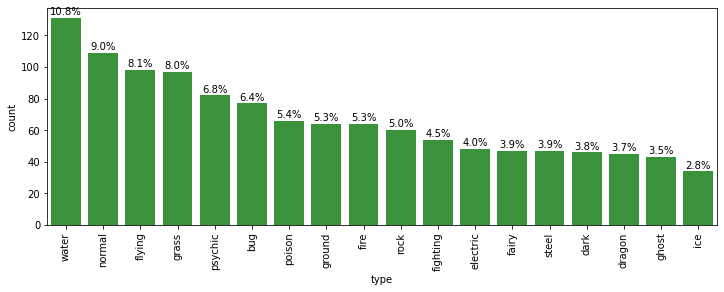

In [27]:
# EXTRA CREDIT lets make this horizontal instead, and change the size!

base_color = sb.color_palette()[2]
sb.countplot(data = pkmn_types, x = 'type', color = base_color, order = type_order);

#recalculating type_counts for clarity
type_counts = pkmn_types['type'].value_counts()

#rotate tick locations and labels and store in a variable
locs, labels = plt.xticks(rotation=90)

#adjusted the loop arguments for a horizontal bar chart:
for loc, label in zip(locs, labels):
    # use get_text to grab category names
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black');

In [28]:
# lets adjust the display for the next section:
rcParams['figure.figsize'] = 6,4

## Univariate Exploration
### Quantitative Data

A histogram would be best for this kind of data.

In [29]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


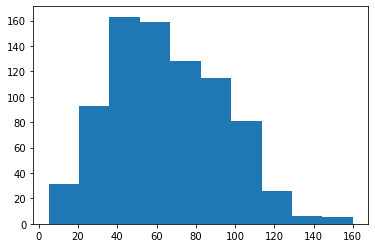

In [30]:
# lets plot a histogram of the speed for each pokemon:
plt.hist(data = pokemon, x = 'speed');

Initially, the data appears to be unimodal and right-skewed. The tick marks are not lined up with the bins, making interpretation trickier. Let's make some adjustments

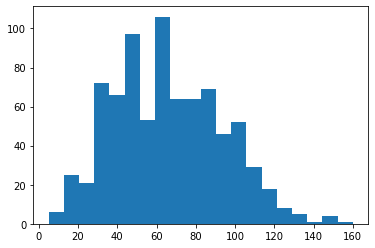

In [31]:
# first change the bin sizes to get more details.
plt.hist(data = pokemon, x = 'speed', bins = 20);

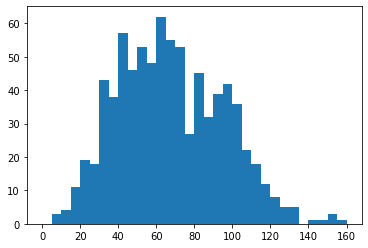

In [32]:
# specify the bin values in our argument for the tick mark issue.
# note:the arange funciton excludes the max value, which is why we added 5 to account for it.
bins = np.arange(0, pokemon['speed'].max()+5,5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

/Users/brittneykakie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


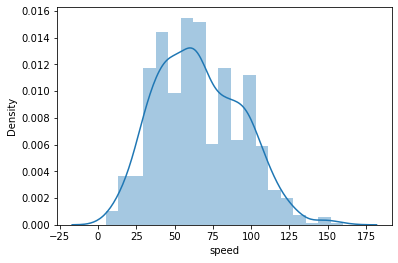

In [34]:
# Use seaborn to add a density curve
sb.distplot(pokemon['speed']);

Below is an example of how adjusting our axis points and bin sizes will help us to get a better interpretation of our data.

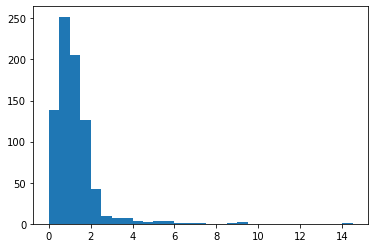

In [39]:
bins = np.arange(0, pokemon['height'].max()+0.5,0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

Lets make some adjustments to our axis limits using the `xlim` function so that we can zoom in on our data:

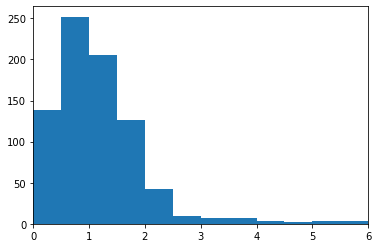

In [41]:
bins = np.arange(0, pokemon['height'].max()+0.5,0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0,6));

Now we can see our pokemons average height, with a few that are much larger.